In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# 3. Part I

## 3.1 Batch mode training using least squares - supervised learning of network weights


In [3]:
def phi(x, mu, sigma):
    return(np.exp(-((x-mu)**2)/(2*sigma**2)))
# sin 2x
def f1(x):
    return(np.sin(2*x))
# square 2x
def f2(x):
    return(np.sign(np.sin(2*x)))

In [4]:
x_train = np.arange(0, 2*np.pi, 0.1)
x_test = np.arange(0.05, 2*np.pi, 0.1)
y1_train = f1(x_train)
y2_train = f2(x_train)
y1_test = f1(x_test)
y2_test = f2(x_test)

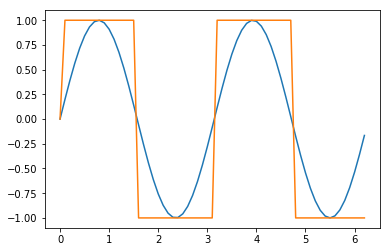

In [5]:
plt.plot(x_train, y1_train)
plt.plot(x_train, y2_train)

In [6]:
def initialize_phi_param(n,x):
    # We assume that we position the gaussians at regular intervals in the range of the points
    # and sigma will be sigma of points distributions
    # n number of hidden units
    x_min, x_max = min(x), max(x)
    mu_v = np.linspace(x_min,x_max,n)
    delta = mu_v[1]-mu_v[0]
    std_x = delta
    sigma_v = np.array([std_x for i in range(n)])
    return(mu_v, sigma_v)

def rbf_batch_build(x, y, n_hidden):
    N = len(x)
    n = n_hidden
    mu_v, sigma_v = initialize_phi_param(n,x)
    phi_mat = np.array([phi(x, mu_v[i], sigma_v[i]) for i in range(n)]).T
    # Calculating w
    to_inverse = phi_mat.T @ phi_mat
    inv = np.linalg.inv(to_inverse)
    w = inv @ phi_mat.T @ y
    
    return(mu_v, sigma_v, w)

def rbf_batch_compute(x, mu_v, sigma_v, w):
    phi_mat = np.array([phi(x, mu_v[i], sigma_v[i]) for i in range(len(mu_v))]).T
    return(phi_mat @ w)

def rbf_batch_test(x_train,y_train, x_test, y_test, n_hidden):
    mu_v, sigma_v, w = rbf_batch_build(x_train, y_train, n_hidden)
    output = rbf_batch_compute(x_test, mu_v, sigma_v, w)
    return(np.mean(abs(output-y_test)))



Limit to have error < 0.1:  4
Limit to have error < 0.01:  10
Limit to have error < 0.001:  52


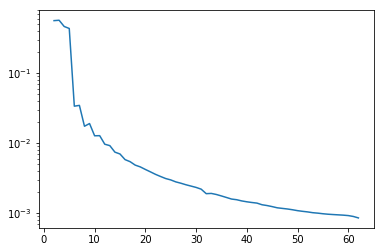

In [7]:
error = []
for n_hidden in [i for i in range (2,63)]:
    e = rbf_batch_test(x_train,y1_train, x_test, y1_test, n_hidden)
    #print('N_hidden : ',n_hidden, 'Error : ',e)
    error.append(e)
plt.plot([i for i in range (2,63)], error)
plt.yscale('log')
error = np.array(error)
if(np.any(error<0.1)):
    print('Limit to have error < 0.1: ', np.min(np.where((error)<0.1)))
else : print('No values < 0.1')
if(np.any(error<0.01)):
    print('Limit to have error < 0.01: ', np.min(np.where((error)<0.01)))
else : print('No values < 0.01')
if(np.any(error<0.001)):
    print('Limit to have error < 0.001: ', np.min(np.where((error)<0.001)))
else : print('No values < 0.01')

No values < 0.1
No values < 0.01
No values < 0.01


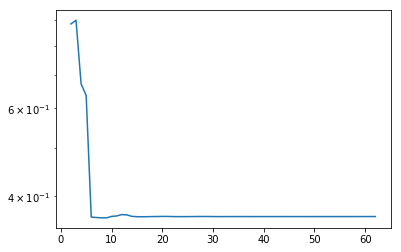

In [8]:
error = []
for n_hidden in [i for i in range (2,63)]:
    e = rbf_batch_test(x_train,y1_train, x_test, y2_test, n_hidden)
    #print('N_hidden : ',n_hidden, 'Error : ',e)
    error.append(e)
plt.plot([i for i in range (2,63)], error)
plt.yscale('log')
error = np.array(error)
if(np.any(error<0.1)):
    print('Limit to have error < 0.1: ', np.min(np.where((error)<0.1)))
else : print('No values < 0.1')
if(np.any(error<0.01)):
    print('Limit to have error < 0.01: ', np.min(np.where((error)<0.01)))
else : print('No values < 0.01')
if(np.any(error<0.001)):
    print('Limit to have error < 0.001: ', np.min(np.where((error)<0.001)))
else : print('No values < 0.01')

Limit to have error < 0.1:  4
Limit to have error < 0.01:  4
Limit to have error < 0.001:  4


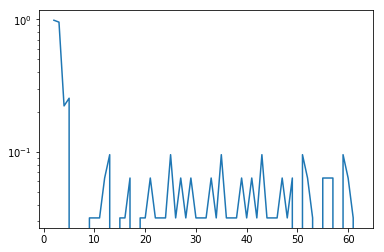

In [9]:
error = []
for n_hidden in [i for i in range (2,63)]:
    mu_v, sigma_v, w = rbf_batch_build(x_train, y2_train, n_hidden)
    output = np.sign(rbf_batch_compute(x_test, mu_v, sigma_v, w))
    e = (np.mean(abs(output-y2_test)))
    error.append(e)
plt.plot([i for i in range (2,63)], error)
plt.yscale('log')
error = np.array(error)
if(np.any(error<0.1)):
    print('Limit to have error < 0.1: ', np.min(np.where((error)<0.1)))
else : print('No values < 0.1')
if(np.any(error<0.01)):
    print('Limit to have error < 0.01: ', np.min(np.where((error)<0.01)))
else : print('No values < 0.01')
if(np.any(error<0.001)):
    print('Limit to have error < 0.001: ', np.min(np.where((error)<0.001)))
else : print('No values < 0.01')

Signal processing?

In [10]:
def rbf_sequential_build(x, y, n_hidden, eta):
    seq = [i for i in range(len(x))]
    np.random.shuffle(seq)
    x, y =  x[seq], y[seq]
    N = len(x)
    n = n_hidden
    mu_v, sigma_v = initialize_phi_param(n,x)    
    phi_mat = np.array([phi(x, mu_v[i], sigma_v[i]) for i in range(n)]).T
    w = 2*np.random.random(size=n_hidden)-1
    
    for i in range(N):
        output = phi_mat[i] @ w
        e = y[i]-output
        w +=  eta * e * phi_mat[i]
    
    return mu_v, sigma_v, w

def rbf_sequential_test(x_train, y_train, x_test, y_test, n_hidden, eta):
    mu_v, sigma_v, w = rbf_sequential_build(x_train, y_train, n_hidden, eta)
    phi_mat = np.array([phi(x_test, mu_v[i], sigma_v[i]) for i in range(n_hidden)]).T
    output = phi_mat @ w
    return(np.mean(abs(output-y_test)))

def rbf_sequential_epochs_build(x, y, n_hidden, epochs, eta):
    seq = [i for i in range(len(x))]
    np.random.shuffle(seq)
    x, y =  x[seq], y[seq]
    N = len(x)
    n = n_hidden
    mu_v, sigma_v = initialize_phi_param(n,x)    
    phi_mat = np.array([phi(x, mu_v[i], sigma_v[i]) for i in range(n)]).T
    w = 2*np.random.random(size=n_hidden)-1
    for epoch in range(epochs):
        for i in range(N):
            output = phi_mat[i] @ w
            e = y[i]-output
            w +=  eta * e * phi_mat[i]
    
    return mu_v, sigma_v, w

def rbf_sequential_epochs_test(x_train, y_train, x_test, y_test, n_hidden, epochs, eta):
    mu_v, sigma_v, w = rbf_sequential_epochs_build(x_train, y_train, n_hidden, epochs, eta)
    phi_mat = np.array([phi(x_test, mu_v[i], sigma_v[i]) for i in range(n_hidden)]).T
    output = phi_mat @ w
    return(np.mean(abs(output-y_test)))


Limit to have error < 0.1:  5
No values < 0.01
No values < 0.01


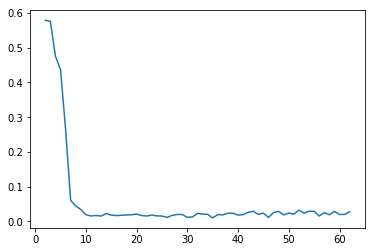

In [11]:
error = []
for n_hidden in [i for i in range (2,63)]:
    e = rbf_sequential_epochs_test(x_train, y1_train, x_test, y1_test, n_hidden, 100, 0.1)
    #print('N_hidden : ',n_hidden, 'Error : ',e)
    error.append(e)
plt.plot([i for i in range (2,63)], error)
error = np.array(error)
if(np.any(error<0.1)):
    print('Limit to have error < 0.1: ', np.min(np.where((error)<0.1)))
else : print('No values < 0.1')
if(np.any(error<0.01)):
    print('Limit to have error < 0.01: ', np.min(np.where((error)<0.01)))
else : print('No values < 0.01')
if(np.any(error<0.001)):
    print('Limit to have error < 0.001: ', np.min(np.where((error)<0.001)))
else : print('No values < 0.01')

## 3.2

In [12]:
x_train_noise = x_train + np.random.normal(loc=0, scale=0.01, size=len(x_train))
x_test_noise = x_test + np.random.normal(loc=0, scale=0.01, size=len(x_test))

Limit to have error < 0.1:  4
Limit to have error < 0.01:  12
No values < 0.01


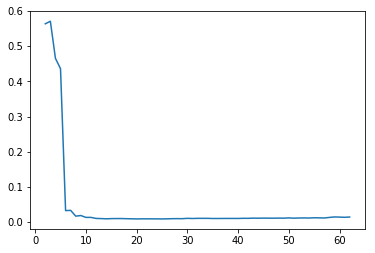

In [13]:
error = []
for n_hidden in [i for i in range (2,63)]:
    e = rbf_batch_test(x_train_noise, y1_train, x_test, y1_test, n_hidden)
    error.append(e)
plt.plot([i for i in range (2,63)], error)
error = np.array(error)
if(np.any(error<0.1)):
    print('Limit to have error < 0.1: ', np.min(np.where((error)<0.1)))
else : print('No values < 0.1')
if(np.any(error<0.01)):
    print('Limit to have error < 0.01: ', np.min(np.where((error)<0.01)))
else : print('No values < 0.01')
if(np.any(error<0.001)):
    print('Limit to have error < 0.001: ', np.min(np.where((error)<0.001)))
else : print('No values < 0.01')

Eta:  0.01 , Limit to have error < 0.1:  5
No values < 0.01
No values < 0.001
Eta:  0.1 , Limit to have error < 0.1:  5
No values < 0.01
No values < 0.001
Eta:  0.5 , Limit to have error < 0.1:  5
No values < 0.01
No values < 0.001


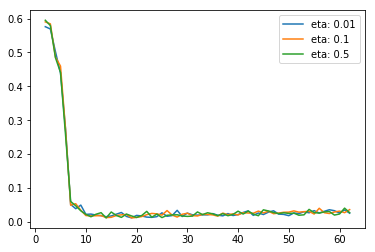

In [14]:
etas = [0.01, 0.1, 0.5]
fig, ax = plt.subplots()
for eta in etas:
    error = []
    for n_hidden in [i for i in range (2,63)]:
        e = rbf_sequential_epochs_test(x_train_noise, y1_train, x_test, y1_test, n_hidden, 100, 0.1)
        error.append(e)
    ax.plot([i for i in range (2,63)], error, label = 'eta: '+str(eta))
    error = np.array(error)
    if(np.any(error<0.1)):
        print('Eta: ',eta,', Limit to have error < 0.1: ', np.min(np.where((error)<0.1)))
    else : print('No values < 0.1')
    if(np.any(error<0.01)):
        print('Eta: ',eta,', Limit to have error < 0.01: ', np.min(np.where((error)<0.01)))
    else : print('No values < 0.01')
    if(np.any(error<0.001)):
        print('Eta: ',eta,', Limit to have error < 0.001: ', np.min(np.where((error)<0.001)))
    else : print('No values < 0.001')
ax.legend()

Random placement vs uniform placement

In [15]:
def initialize_phi_param_random(n,x):
    # We assume that we position the gaussians at regular intervals in the range of the points
    # and sigma will be sigma of points distributions
    # n number of hidden units
    x_min, x_max = min(x), max(x)
    mu_v = np.random.random(n)*2*np.pi
    delta = mu_v[1]-mu_v[0]
    std_x = delta
    sigma_v = np.array([std_x for i in range(n)])
    return(mu_v, sigma_v)

def rbf_batch_build_random(x, y, n_hidden):
    N = len(x)
    n = n_hidden
    mu_v, sigma_v = initialize_phi_param_random(n,x)
    phi_mat = np.array([phi(x, mu_v[i], sigma_v[i]) for i in range(n)]).T
    # Calculating w
    to_inverse = phi_mat.T @ phi_mat
    inv = np.linalg.inv(to_inverse)
    w = inv @ phi_mat.T @ y
    
    return(mu_v, sigma_v, w)

def rbf_batch_compute_random(x, mu_v, sigma_v, w):
    phi_mat = np.array([phi(x, mu_v[i], sigma_v[i]) for i in range(len(mu_v))]).T
    return(phi_mat @ w)

def rbf_batch_test_random(x_train,y_train, x_test, y_test, n_hidden):
    mu_v, sigma_v, w = rbf_batch_build_random(x_train, y_train, n_hidden)
    output = rbf_batch_compute_random(x_test, mu_v, sigma_v, w)
    return(np.mean(abs(output-y_test)))


Limit to have error < 0.1:  4
Limit to have error < 0.01:  12
No values < 0.01
Limit to have error < 0.1:  6
No values < 0.01
No values < 0.01


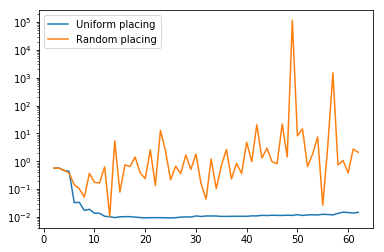

In [16]:
fig, ax = plt.subplots()

error1 = []
for n_hidden in [i for i in range (2,63)]:
    e = rbf_batch_test(x_train_noise, y1_train, x_test, y1_test, n_hidden)
    error1.append(e)
ax.plot([i for i in range (2,63)], error1, label ='Uniform placing')
error1 = np.array(error1)
if(np.any(error1<0.1)):
    print('Limit to have error < 0.1: ', np.min(np.where((error1)<0.1)))
else : print('No values < 0.1')
if(np.any(error1<0.01)):
    print('Limit to have error < 0.01: ', np.min(np.where((error1)<0.01)))
else : print('No values < 0.01')
if(np.any(error1<0.001)):
    print('Limit to have error < 0.001: ', np.min(np.where((error1)<0.001)))
else : print('No values < 0.01')
    
error2 = []
for n_hidden in [i for i in range (2,63)]:
    e = rbf_batch_test_random(x_train_noise, y1_train, x_test, y1_test, n_hidden)
    error2.append(e)
ax.plot([i for i in range (2,63)], error2, label ='Random placing')
error2 = np.array(error2)
if(np.any(error2<0.1)):
    print('Limit to have error < 0.1: ', np.min(np.where((error2)<0.1)))
else : print('No values < 0.1')
if(np.any(error2<0.01)):
    print('Limit to have error < 0.01: ', np.min(np.where((error2)<0.01)))
else : print('No values < 0.01')
if(np.any(error2<0.001)):
    print('Limit to have error < 0.001: ', np.min(np.where((error2)<0.001)))
else : print('No values < 0.01')
    
plt.yscale('log')
ax.legend()

Let's choose for 15 hidden

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras

model = Sequential([
        Dense(5, input_shape=(1,), use_bias = True, activation = 'sigmoid'),
        Dense(5, use_bias = True, activation = 'sigmoid'),
        Dense(1, use_bias = True),
    ])

# For a mean squared error regression problem
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, verbose=1)
    
# Converting to float32 to remove keras warnings
x_split_train = np.array(x_train_noise, dtype=('float32'))
x_split_valid = np.array(x_test, dtype=('float32'))
output_split_train = np.array(y1_train, dtype=('float32'))
output_split_valid = np.array(y1_test, dtype=('float32'))
    
hist = model.fit(x_split_train, output_split_train, callbacks=[early_stop], epochs=100 ,verbose=0)

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using CNTK backend
C:\Program Files\Anaconda3\lib\site-packages\keras\backend\cntk_backend.py:25: UserWarning: CNTK backend warning: GPU is not detected. CNTK's CPU version is not fully optimized,please run with GPU to get better performance.
  'CNTK backend warning: GPU is not detected. '


In [18]:
print('Error for the MLP:')
print(np.mean(abs((model.predict(x_split_valid)).T-y1_test)))

Error for the MLP:
0.648382170600282


In [19]:
mu_v, sigma_v, w = rbf_batch_build(x_train, y1_train, n_hidden=15)
mu_v_r, sigma_v_r, w_r = rbf_batch_build_random(x_train, y1_train, n_hidden=15)

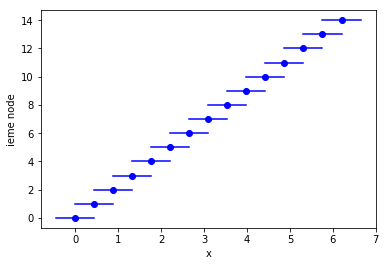

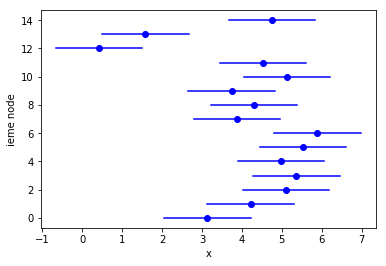

In [20]:
def visualize_rbf(ax, mu_v, sigma_v, c= 'b', alpha = 1):
    n = len(mu_v)
    for i in range(n):
        ax.plot([mu_v[i]-sigma_v[i],mu_v[i]+sigma_v[i]], [i,i], c, alpha = alpha)
        ax.plot(mu_v[i], [i], 'o', color=c, alpha = alpha)
    return(ax)

fig, ax = plt.subplots()
ax = visualize_rbf(ax, mu_v, sigma_v)
ax.set_xlabel('x')
ax.set_ylabel('ieme node')
plt.show()

fig, ax = plt.subplots()
ax = visualize_rbf(ax, mu_v_r, sigma_v_r)
ax.set_xlabel('x')
ax.set_ylabel('ieme node')
plt.show()

## 3.3 Competitive learning

In [21]:
def cl(x, mu_v, sigma_v, epochs):
    mu_v2 = [i for i in mu_v]
    for epoch in range(epochs):
        i = np.random.randint(0,len(x))
        distances = abs(mu_v2-x[i])
        chosen_node = np.where(distances==np.min(distances))[0][0]

        mu_v2[chosen_node] = 0.8*mu_v2[chosen_node] + 0.2*x[i]
    mu_v1 = np.array(mu_v2[1:])
    sigma = np.mean(mu_v1-mu_v2[:-1])
    sigma_v = [sigma for i in range(len(mu_v))]
    return(mu_v2, sigma_v)

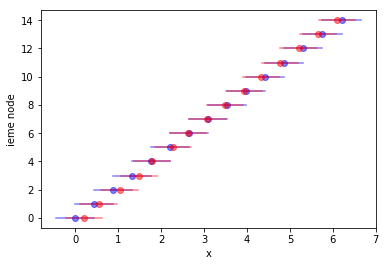

In [22]:
mu_v2, sigma_v2 = cl(x_train, mu_v, sigma_v, 1000)
fig, ax = plt.subplots()
ax = visualize_rbf(ax, mu_v, sigma_v, alpha = 0.5)
ax = visualize_rbf(ax, mu_v2, sigma_v2, c = 'r', alpha = 0.5)
ax.set_xlabel('x')
ax.set_ylabel('ieme node')
plt.show()

In [23]:
def cl_no_deadunit(x, mu_v, sigma_v, epochs):
    mu_v2 = [i for i in mu_v]
    for epoch in range(epochs):
        i = np.random.randint(0,len(x))
        distances = abs(mu_v2-x[i])
        chosen_nodes = np.argsort(distances)[:8]
        for k in range(8):
            mu_v2[chosen_nodes[k]] = (0.2+0.1*k)*mu_v2[chosen_nodes[k]] + (0.8-0.1*k)*x[i]
           
    mu_v1 = np.array(mu_v2[1:])
    sigma = np.mean(mu_v1-mu_v2[:-1])
    sigma_v = [sigma for i in range(len(mu_v))]
    return(mu_v2, sigma_v)

In [24]:
points1 = np.random.normal(loc=-5, scale=1, size = 20)
points2 = np.random.normal(loc = 5, scale = 1, size = 20)
points = np.concatenate([points1, points2])

In [25]:
np.argsort(distances)[:3]

NameError: name 'distances' is not defined

In [ ]:
fig, ax = plt.subplots()
mu_v, sigma_v, w = rbf_batch_build(points, [0 for i in range(40)], n_hidden=15)
ax = visualize_rbf(ax, mu_v, sigma_v, alpha = 0.5)
mu_v2, sigma_v2 = cl(x_train, mu_v, sigma_v, 1000)
mu_v3, sigma_v3 = cl_no_deadunit(x_train, mu_v, sigma_v, 100)
#ax = visualize_rbf(ax, mu_v2, sigma_v2, alpha = 0.5, c = 'r')
ax = visualize_rbf(ax, mu_v3, sigma_v3, alpha = 0.5, c = 'g')
ax.plot(points, [-1 for i in range(40)], 'o', alpha = 0.5)

Ballistic part

In [ ]:
ballist = np.loadtxt('../../data_lab2/ballist.dat')
balltest = np.loadtxt('../../data_lab2/balltest.dat')

In [ ]:
ballist_x = ballist.T[0:2]
ballist_y = ballist.T[2:4]
balltest_x = balltest.T[0:2]
balltest_y = balltest.T[2:4]

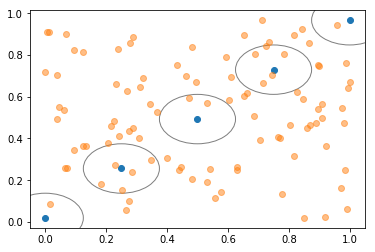

In [975]:
from matplotlib.patches import Ellipse
mu_v, sigma_v = initialize_phi_param_r2(x=ballist_x,n=5)
fig, ax = plt.subplots()
ax.plot(mu_v[0], mu_v[1], 'o')
ellipses = [Ellipse(xy=(mu_v[0][i],mu_v[1][i]),height=sigma_v[i][1],width=sigma_v[i][0], fill = False, alpha = 0.5) for i in range(len(mu_v[0]))]

for e in ellipses:
    ax.add_artist(e)
    
ax.plot(ballist_x[0],ballist_x[1], 'o', alpha = 0.5)

In [1000]:
mu_v2, sigma_v2 = cl_R2(ballist_x, mu_v, sigma_v, epochs=50)

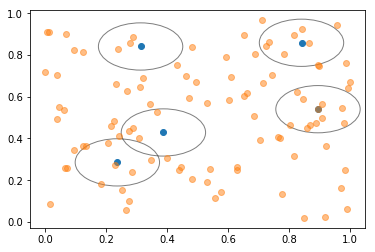

In [1001]:
from matplotlib.patches import Ellipse
fig, ax = plt.subplots()
ax.plot(mu_v2[0], mu_v2[1], 'o')
ellipses = [Ellipse(xy=(mu_v2[0][i],mu_v2[1][i]),height=sigma_v2[i][1],width=sigma_v2[i][0], fill = False, alpha = 0.5) for i in range(len(mu_v2[0]))]

for e in ellipses:
    ax.add_artist(e)
    
ax.plot(ballist_x[0],ballist_x[1], 'o', alpha = 0.5)

In [ ]:
def phi_r2_mat(x, mu, sigma):
    return(np.exp(-(((x[0]-mu[0])**2)/(2*sigma[0]**2)+((x[1]-mu[1])**2)/(2*sigma[1]**2))))


def initialize_phi_param_r2(n,x):
    # We assume that we position the gaussians at regular intervals in the range of the points
    # and sigma will be sigma of points distributions
    # n number of hidden units
    x1_min, x1_max = np.min(x[0]), np.max(x[0])
    mu_v_x1 = np.linspace(x1_min,x1_max,n)
    x2_min, x2_max = np.min(x[1]), np.max(x[1])
    mu_v_x2 = np.linspace(x2_min,x2_max,n)
    mu_v = np.array([mu_v_x1, mu_v_x2])
    delta_x1 = mu_v_x1[1]-mu_v_x1[0]
    delta_x2 = mu_v_x2[1]-mu_v_x2[0]
    std_x = [delta_x1, delta_x2]
    sigma_v = np.array([std_x for i in range(n)])
    return(mu_v, sigma_v)

def cl_R2(x, mu_v, sigma_v, epochs):
    mu_v2 = np.array([i for i in mu_v])
    n = len(mu_v[0])
    for epoch in range(epochs):
        i = np.random.randint(0,len(x))
        distances = [np.sqrt((mu_v2[0][k]-x[0][i])**2+(mu_v2[1][k]-x[1][i])**2) for k in range(len(mu_v[0]))]
        chosen_nodes = np.argsort(distances)
        update = [0.5, 0.99, 0.99, 0.99, 0.99]
        for k in range(n):
            mu_v2[0][chosen_nodes[k]] = update[k]*mu_v2[0][chosen_nodes[k]] + (1-update[k])*x[0][i]
            mu_v2[1][chosen_nodes[k]] = update[k]*mu_v2[1][chosen_nodes[k]] + (1-update[k])*x[1][i]
            
    mu_v1_x1 = np.array(mu_v2[0][1:])
    sigma1 = np.std(mu_v2[0])
    mu_v1_x2 = np.array(mu_v2[1][1:])
    sigma2 = np.std(mu_v2[1])
    sigma_v = [[sigma1,sigma2] for i in range(len(mu_v2[0]))]
    return(mu_v2, sigma_v)

def rbf_sequential_build_r2(x, y, n_hidden, eta):
    xT, yT = x.T, y.T
    seq = [i for i in range(len(xT))]
    np.random.shuffle(seq)
    xT, yT =  xT[seq], yT[seq]
    n = n_hidden
    mu_v, sigma_v = initialize_phi_param_r2(n,x)
    mu_v, sigma_v = cl_R2(x, mu_v, sigma_v, 50)
    phi_mat = np.array([phi_r2_mat(xT.T, mu_v.T[i], sigma_v[i]) for i in range(n)]).T
    w1 = 2*np.random.random(size=n_hidden)-1
    w2 = 2*np.random.random(size=n_hidden)-1
    
    for i in range(N):
        output = phi_mat[i] @ w1
        e = yT[i][0]-output
        w1 +=  eta * e * phi_mat[i]
        output = phi_mat[i] @ w2
        e = yT[i][1]-output
        w2 +=  eta * e * phi_mat[i]
    
    return  w1, w2

def rbf_sequential_test(x_train, y_train, x_test, y_test, n_hidden, eta):
    mu_v, sigma_v, w = rbf_sequential_build(x_train, y_train, n_hidden, eta)
    phi_mat = np.array([phi(x_test, mu_v[i], sigma_v[i]) for i in range(n_hidden)]).T
    output = phi_mat @ w
    return(np.mean(abs(output-y_test)))

def rbf_sequential_epochs_build(x, y, n_hidden, epochs, eta):
    xT, yT = x.T, y.T
    seq = [i for i in range(len(xT))]
    np.random.shuffle(seq)
    xT, yT =  xT[seq], yT[seq]
    N = len(xT)
    n = n_hidden
    mu_v, sigma_v = initialize_phi_param_r2(n,x)
    mu_v, sigma_v = cl_R2(x, mu_v, sigma_v, 50)
    phi_mat = np.array([phi_r2_mat(xT.T, mu_v.T[i], sigma_v[i]) for i in range(n)]).T
    w1 = 2*np.random.random(size=n_hidden)-1
    w2 = 2*np.random.random(size=n_hidden)-1
    for epoch in range(epochs):
        for i in range(N):
            output = phi_mat[i] @ w1
            e = yT[i][0]-output
            w1 +=  eta * e * phi_mat[i]
            output = phi_mat[i] @ w2
            e = yT[i][1]-output
            w2 +=  eta * e * phi_mat[i]
    w = np.array([w1,w2])
    return mu_v, sigma_v, w

def rbf_sequential_epochs(x_train, y_train, x_test, y_test, n_hidden, epochs, eta):
    mu_v, sigma_v, w = rbf_sequential_epochs_build(x_train, y_train, n_hidden, epochs, eta)
    phi_mat = np.array([phi_r2_mat(x_test, mu_v.T[i], sigma_v[i]) for i in range(n_hidden)]).T
    output1 = phi_mat @ w[0]
    output2 = phi_mat @ w[1]
    output = np.array([output1,output2])
    return(output)


Result of our RBF

In [1]:
result = rbf_sequential_epochs(ballist_x, ballist_y, balltest_x, balltest_y, 5, 20, 0.1)

error = []
for i in range(len(balltest[0])):
    error.append((result[0][i]-balltest[0][1])**2+(result[1][i]-balltest[1][1])**2)
np.mean(error)

fig, ax = plt.subplots()
plt.plot(balltest_y[0], balltest_y[1], 'o')
plt.plot(result[0], result[1], 'o')

NameError: name 'rbf_sequential_epochs' is not defined

In [992]:
np.array(v)

array([2, 4])

array([[0.896, 0.279, 0.307, 0.974, 0.069, 0.29 , 0.015, 0.686, 0.277,
        0.743, 0.433, 0.251, 0.661, 0.096, 0.771, 0.992, 0.988, 0.007,
        0.689, 0.228, 0.894, 0.276, 0.227, 0.542, 0.999, 0.53 , 0.073,
        0.244, 0.001, 0.012, 0.983, 0.815, 0.631, 0.629, 0.803, 0.062,
        0.438, 0.909, 0.86 , 0.461, 0.714, 0.61 , 0.869, 0.366, 0.713,
        0.765, 0.89 , 0.216, 0.039, 0.343, 0.264, 0.815, 0.038, 0.483,
        0.185, 0.972, 0.239, 0.53 , 0.495, 0.979, 0.736, 0.205, 0.827,
        0.867, 0.232, 0.605, 0.045, 0.126, 0.135, 0.92 , 0.724, 0.956,
        0.784, 0.288, 0.349, 0.899, 0.558, 0.482, 0.652, 0.095, 0.125,
        0.576, 0.067, 0.286, 0.31 , 0.85 , 0.473, 0.705, 0.99 , 0.594,
        0.909, 0.27 , 0.399, 0.847, 0.32 , 0.445, 0.651, 0.917, 0.776,
        0.844],
       [0.54 , 0.859, 0.403, 0.546, 0.903, 0.448, 0.085, 0.507, 0.434,
        0.705, 0.752, 0.154, 0.62 , 0.823, 0.403, 0.643, 0.763, 0.91 ,
        0.805, 0.274, 0.753, 0.1  , 0.482, 0.254, 0.673, 0.57